https://www.kaggle.com/code/mohitchaitanya/simple-iris-dataset-classification-using-pytorch

In [53]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target

for i in iris.feature_names:
    print(i)

print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")


sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)
X.shape: (150, 4)
y.shape: (150,)
X_train.shape: (112, 4)
X_test.shape: (38, 4)
y_train.shape: (112,)
y_test.shape: (38,)


In [54]:
import torch

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [55]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(input_dim, 128)
        self.hidden_layer1 = nn.Linear(128, 64)
        self.output_layer = nn.Linear(64, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.relu(self.input_layer(x))
        out = self.relu(self.hidden_layer1(out))
        out = self.output_layer(out)
        return out

input_dim = X_train.shape[1]
output_dim = 3

model = NeuralNetwork(input_dim, output_dim)




In [56]:
lr = 0.01

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [57]:
from tqdm import tqdm

epochs = 1000
train_loss = []
test_loss = []

for epoch in tqdm(range(epochs)):
    optimizer.zero_grad()

    output_train = model(X_train)

    loss_train = criterion(output_train, y_train)

    loss_train.backward()

    optimizer.step()

    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)

    train_loss.append(loss_train.item())
    test_loss.append(loss_test.item())

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

print("Training complete")





 13%|█▎        | 126/1000 [00:00<00:00, 1249.74it/s]

Epoch 50/1000, Train Loss: 0.0652, Test Loss: 0.0273
Epoch 100/1000, Train Loss: 0.0576, Test Loss: 0.0278
Epoch 150/1000, Train Loss: 0.0552, Test Loss: 0.0314


 25%|██▌       | 251/1000 [00:00<00:00, 1122.99it/s]

Epoch 200/1000, Train Loss: 0.0494, Test Loss: 0.0146
Epoch 250/1000, Train Loss: 0.0466, Test Loss: 0.0149


 38%|███▊      | 385/1000 [00:00<00:00, 1214.40it/s]

Epoch 300/1000, Train Loss: 0.0844, Test Loss: 0.0216
Epoch 350/1000, Train Loss: 0.0570, Test Loss: 0.0061
Epoch 400/1000, Train Loss: 0.0419, Test Loss: 0.0078
Epoch 450/1000, Train Loss: 0.0403, Test Loss: 0.0075


 56%|█████▌    | 559/1000 [00:00<00:00, 1413.77it/s]

Epoch 500/1000, Train Loss: 0.0399, Test Loss: 0.0069
Epoch 550/1000, Train Loss: 0.0386, Test Loss: 0.0056
Epoch 600/1000, Train Loss: 0.0380, Test Loss: 0.0051


 73%|███████▎  | 729/1000 [00:00<00:00, 1512.50it/s]

Epoch 650/1000, Train Loss: 0.0406, Test Loss: 0.0071
Epoch 700/1000, Train Loss: 0.0380, Test Loss: 0.0075
Epoch 750/1000, Train Loss: 0.0364, Test Loss: 0.0063
Epoch 800/1000, Train Loss: 0.0353, Test Loss: 0.0048
Epoch 850/1000, Train Loss: 0.0339, Test Loss: 0.0043


 89%|████████▉ | 891/1000 [00:00<00:00, 1542.30it/s]

Epoch 900/1000, Train Loss: 0.0328, Test Loss: 0.0039
Epoch 950/1000, Train Loss: 0.0317, Test Loss: 0.0029


100%|██████████| 1000/1000 [00:00<00:00, 1412.76it/s]

Epoch 1000/1000, Train Loss: 0.0315, Test Loss: 0.0027
Training complete


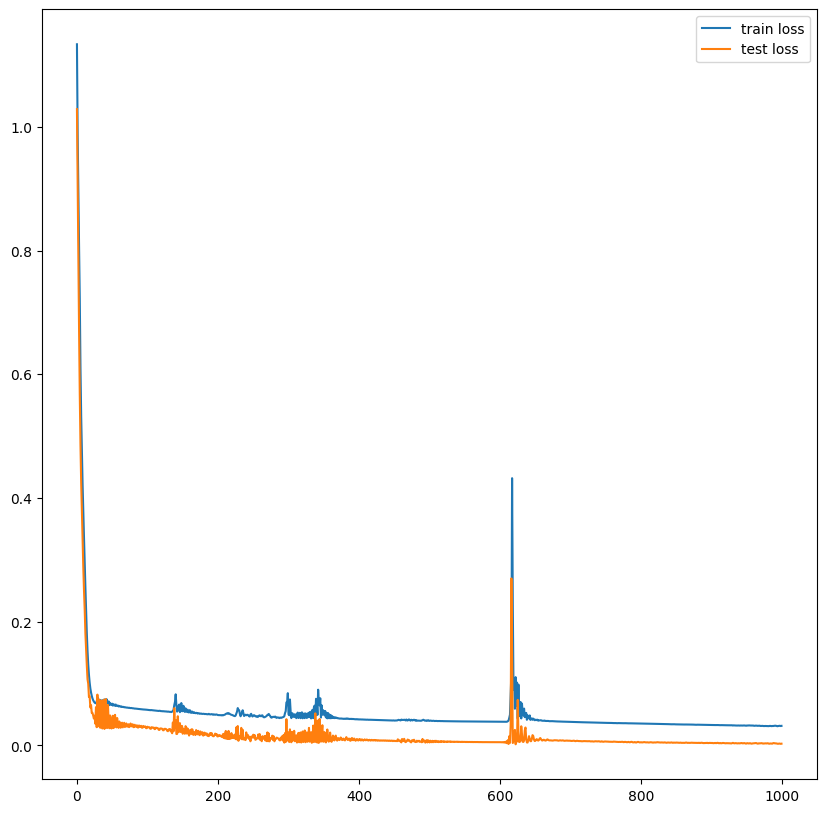

In [58]:
plt.figure(figsize=(10,10))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.show()

In [59]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

def get_accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)
train_acc = get_accuracy_multiclass(predictions_train,y_train)
test_acc  = get_accuracy_multiclass(predictions_test,y_test)
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 99.107
Test Accuracy: 100.0
